[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_2_AnalisisEstadistico/notebook/Extra_Scrappig_Ejercicio.ipynb)

<h1><center>Otro ejemplo Scrapping</center></h1>
<h3><font color="red">¿Qué hace a una pelicula buena?</font></h3>

La mayoría de las películas mejor calificadas en la base de datos internacional de películas (IMDB) son aclamadas por la crítica y generalmente son una apuesta segura en términos de éxito comercial. 

Naturalmente, sería interesante investigar si estas películas principales tienen algunas características distintivas responsables de sus altas calificaciones. 

----------------
Este proyecto tiene como objetivo descubrir el tipo de clúster natural que existe entre las 250 mejores películas de IMDB. Se emplearán técnicas de aprendizaje automático no supervisadas, más específicamente, algoritmos de agrupamiento. 

----------------
Con suerte, estos grupos nos darán información para observar el patrón recurrente. Para construir nuestro conjunto de datos, usamos la API web de OMDB, que es un servicio [web RESTful](https://www.codigonaranja.com/restful-web-service) para obtener información de películas. 

----------------
Para los resúmenes de la trama, eliminamos la trama de una película del sitio web de IMDB utilizando la biblioteca BeautifulSoup en Python. Nuestro dataframe extraído final tendrá 250 filas.... 


----------------
Las entradas son casi todas de tipo categóricas y las tendremos que codificar con **one hot-encoding**. 

Primero usaremos técnicas de reducción de dimensionalidad como PCA y luego K-Means y DB-SCAN para encontrar grupos en los datos.

<font color=red>JSON (acrónimo de JavaScript Object Notation)</font> es un formato de texto sencillo para el intercambio de datos. Se trata de un subconjunto de la notación literal de objetos de JavaScript, aunque, debido a su amplia adopción como alternativa a XML, se considera un formato independiente del lenguaje.

In [1]:
# import urllib2
from bs4 import BeautifulSoup
import requests
from requests import get
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import datetime as dt
import string
from matplotlib import pyplot as plt
sns.set(style="ticks")

[NLTK](https://www.nltk.org/) ha sido llamado "una herramienta maravillosa para enseñar y trabajar en lingüística computacional usando Python" y "una biblioteca increíble para jugar con el lenguaje natural".

In [2]:
import nltk

[Stemming](https://www.geeksforgeeks.org/snowball-stemmer-nlp/): en palabras simples, derivar es reducir una palabra a su palabra base o raíz de tal manera que las palabras de tipo similar se encuentren bajo una raíz común.

In [3]:
from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn

La clase **[DictVectorizer](https://scikit-learn.org/stable/modules/feature_extraction.html)** se puede utilizar para convertir matrices de características representadas como listas de objetos  estándar de Python a la representación NumPy / SciPy utilizada por los estimadores [scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html).

DictVectorizer implementa lo que se llama codificación one-of-K o "[one-hot](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)" para características categóricas (también conocidas como nominales, discretas). Las características categóricas son pares “atributo-valor” donde el valor se restringe a una lista de posibilidades discretas sin ordenar (por ejemplo, identificadores de temas, tipos de objetos, etiquetas, nombres…).



In [4]:
import re
import os
import codecs

from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('display.notebook_repr_html', True)
sns.set(style="ticks")
%matplotlib inline


import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster')

La primera parte será recopilar todos los ID de imdb de las 250 mejores películas.

In [5]:
url='http://www.imdb.com/chart/top'
page=get(url).content
soup=BeautifulSoup(page,'html.parser')
class_=soup.find_all(name='div',attrs={'class':'wlb_ribbon'})
movie_ids=[c['data-tconst'] for c in class_]

In [6]:
movie_ids

['tt0111161',
 'tt0068646',
 'tt0071562',
 'tt0468569',
 'tt0050083',
 'tt0108052',
 'tt0167260',
 'tt0110912',
 'tt0060196',
 'tt0120737',
 'tt0137523',
 'tt0109830',
 'tt1375666',
 'tt0167261',
 'tt0080684',
 'tt0133093',
 'tt0099685',
 'tt0073486',
 'tt0047478',
 'tt0114369',
 'tt0102926',
 'tt0317248',
 'tt0118799',
 'tt0038650',
 'tt0076759',
 'tt0120815',
 'tt0245429',
 'tt0816692',
 'tt0120689',
 'tt6751668',
 'tt0110413',
 'tt0056058',
 'tt0253474',
 'tt0114814',
 'tt0103064',
 'tt0088763',
 'tt0054215',
 'tt0027977',
 'tt0110357',
 'tt0120586',
 'tt0021749',
 'tt0095327',
 'tt0172495',
 'tt2582802',
 'tt0407887',
 'tt1675434',
 'tt0482571',
 'tt0034583',
 'tt0064116',
 'tt0047396',
 'tt0095765',
 'tt0078748',
 'tt0078788',
 'tt0209144',
 'tt0082971',
 'tt0032553',
 'tt0405094',
 'tt1853728',
 'tt0050825',
 'tt0043014',
 'tt0910970',
 'tt0081505',
 'tt4154756',
 'tt0051201',
 'tt0057012',
 'tt4633694',
 'tt7286456',
 'tt0119698',
 'tt0364569',
 'tt5311514',
 'tt0087843',
 'tt13

Movie_ids es una lista de las 250 mejores identificaciones de películas de imdb.

Usaremos omdb para la recopilación de datos de estas peliculas.



In [7]:
movie_info=[[] for i in range(len(movie_ids))]

for i in range(250):
    url='http://www.omdbapi.com/?i='
    print(url+movie_ids[i]+"&apikey=de12b217")
    r=requests.get(url+movie_ids[i]+"&apikey=de12b217").json()
    for a in r.keys():
        movie_info[i].append(r[a])
        
df_omdb=pd.DataFrame(movie_info,columns=r.keys())

http://www.omdbapi.com/?i=tt0111161&apikey=de12b217
http://www.omdbapi.com/?i=tt0068646&apikey=de12b217
http://www.omdbapi.com/?i=tt0071562&apikey=de12b217
http://www.omdbapi.com/?i=tt0468569&apikey=de12b217
http://www.omdbapi.com/?i=tt0050083&apikey=de12b217
http://www.omdbapi.com/?i=tt0108052&apikey=de12b217
http://www.omdbapi.com/?i=tt0167260&apikey=de12b217
http://www.omdbapi.com/?i=tt0110912&apikey=de12b217
http://www.omdbapi.com/?i=tt0060196&apikey=de12b217
http://www.omdbapi.com/?i=tt0120737&apikey=de12b217
http://www.omdbapi.com/?i=tt0137523&apikey=de12b217
http://www.omdbapi.com/?i=tt0109830&apikey=de12b217
http://www.omdbapi.com/?i=tt1375666&apikey=de12b217
http://www.omdbapi.com/?i=tt0167261&apikey=de12b217
http://www.omdbapi.com/?i=tt0080684&apikey=de12b217
http://www.omdbapi.com/?i=tt0133093&apikey=de12b217
http://www.omdbapi.com/?i=tt0099685&apikey=de12b217
http://www.omdbapi.com/?i=tt0073486&apikey=de12b217
http://www.omdbapi.com/?i=tt0047478&apikey=de12b217
http://www.o

http://www.omdbapi.com/?i=tt0080678&apikey=de12b217
http://www.omdbapi.com/?i=tt0084787&apikey=de12b217
http://www.omdbapi.com/?i=tt0167404&apikey=de12b217
http://www.omdbapi.com/?i=tt4729430&apikey=de12b217
http://www.omdbapi.com/?i=tt0041959&apikey=de12b217
http://www.omdbapi.com/?i=tt0434409&apikey=de12b217
http://www.omdbapi.com/?i=tt0050986&apikey=de12b217
http://www.omdbapi.com/?i=tt2096673&apikey=de12b217
http://www.omdbapi.com/?i=tt0107290&apikey=de12b217
http://www.omdbapi.com/?i=tt0120382&apikey=de12b217
http://www.omdbapi.com/?i=tt0353969&apikey=de12b217
http://www.omdbapi.com/?i=tt0083658&apikey=de12b217
http://www.omdbapi.com/?i=tt0117951&apikey=de12b217
http://www.omdbapi.com/?i=tt0050212&apikey=de12b217
http://www.omdbapi.com/?i=tt1291584&apikey=de12b217
http://www.omdbapi.com/?i=tt0116282&apikey=de12b217
http://www.omdbapi.com/?i=tt0266543&apikey=de12b217
http://www.omdbapi.com/?i=tt0476735&apikey=de12b217
http://www.omdbapi.com/?i=tt0031381&apikey=de12b217
http://www.o

In [8]:
df_omdb

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",Two imprisoned men bond over a number of years...,English,United States,Nominated for 7 Oscars. 21 wins & 43 nominatio...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,434,594",tt0111161,movie,21 Dec 1999,"$28,699,976","Columbia Pictures, Castle Rock Entertainment",N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",An organized crime dynasty's aging patriarch t...,"English, Italian, Latin",United States,Won 3 Oscars. 31 wins & 30 nominations total,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,694,603",tt0068646,movie,01 Aug 2013,"$134,966,411",Paramount Pictures,N/A,True
2,The Godfather: Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo","Al Pacino, Robert De Niro, Robert Duvall",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",United States,Won 6 Oscars. 17 wins & 20 nominations total,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,177,124",tt0071562,movie,24 May 2005,"$47,834,595","Paramount Pictures, Coppola Company",N/A,True
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",When the menace known as the Joker wreaks havo...,"English, Mandarin","United States, United Kingdom",Won 2 Oscars. 159 wins & 163 nominations total,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,403,192",tt0468569,movie,09 Dec 2008,"$534,858,444",Syncopy,N/A,True
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,Reginald Rose,"Henry Fonda, Lee J. Cobb, Martin Balsam",A jury holdout attempts to prevent a miscarria...,English,United States,Nominated for 3 Oscars. 17 wins & 13 nominatio...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,9.0,"719,240",tt0050083,movie,04 Mar 2008,N/A,Orion-Nova Pictures,N/A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Du rififi chez les hommes,1955,Not Rated,05 Jun 1956,118 min,"Crime, Drama, Thriller",Jules Dassin,"Auguste Le Breton, Jules Dassin, René Wheeler","Jean Servais, Carl Möhner, Robert Manuel","Four men plan a technically perfect crime, but...","French, Italian, English",France,6 wins & 1 nomination,https://m.media-amazon.com/images/M/MV5BNjZmZG...,"[{'Source': 'Internet Movie Database', 'Value'...",97,8.1,"32,033",tt0048021,movie,24 Apr 2001,"$517,975","Prima Film, Indusfilms, Société Nouvelle Prodis",N/A,True
246,Sunrise: A Song of Two Humans,1927,Passed,04 Nov 1927,94 min,"Drama, Romance",F.W. Murnau,"Carl Mayer, Hermann Sudermann, Katherine Hilliker","George O'Brien, Janet Gaynor, Margaret Livingston",A sophisticated urban woman seduces a farmer i...,"None, English",United States,Won 3 Oscars. 6 wins & 2 nominations total,https://m.media-amazon.com/images/M/MV5BNDVkYm...,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,8.1,"48,778",tt0018455,movie,12 Oct 2004,N/A,Fox Film Corporation,N/A,True
247,Le notti di Cabiria,1957,Not Rated,16 Oct 1957,110 min,Drama,Federico Fellini,"Federico Fellini, Ennio Flaiano, Tullio Pinelli","Giulietta Masina, François Périer, Franca Marzi",A waifish prostitute wanders the streets of Ro...

In [9]:
url='http://www.imdb.com/title/'
t='/plotsummary?ref_=tt_stry_pl'
plot=[[] for i in range(len(movie_ids))]
for i in range(250):
    print(url+df_omdb.imdbID[i]+t)
    page=get(url+df_omdb.imdbID[i]+t).content
    soup=BeautifulSoup(page,'html.parser')
    class_=soup.find_all(name='li',attrs={'class':'ipl-zebra-list__item'})
    for j in class_:
        plot[i].append(j.get_text(strip = True))

http://www.imdb.com/title/tt0111161/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0068646/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0071562/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0468569/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0050083/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0108052/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0167260/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0110912/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0060196/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0120737/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0137523/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0109830/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt1375666/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0167261/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0080684/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0133093/plot

http://www.imdb.com/title/tt0089881/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0095016/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt6966692/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0363163/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0071853/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0042192/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0053291/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0372784/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0105695/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0118849/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0347149/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0993846/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0057115/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0055031/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0112641/plotsummary?ref_=tt_stry_pl
http://www.imdb.com/title/tt0469494/plot

In [10]:
df_omdb['Plot']=plot
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",[Two imprisoned men bond over a number of year...,English,United States,Nominated for 7 Oscars. 21 wins & 43 nominatio...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,434,594",tt0111161,movie,21 Dec 1999,"$28,699,976","Columbia Pictures, Castle Rock Entertainment",N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",[An organized crime dynasty's aging patriarch ...,"English, Italian, Latin",United States,Won 3 Oscars. 31 wins & 30 nominations total,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,694,603",tt0068646,movie,01 Aug 2013,"$134,966,411",Paramount Pictures,N/A,True
2,The Godfather: Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo","Al Pacino, Robert De Niro, Robert Duvall",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",United States,Won 6 Oscars. 17 wins & 20 nominations total,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,177,124",tt0071562,movie,24 May 2005,"$47,834,595","Paramount Pictures, Coppola Company",N/A,True
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",[When the menace known as the Joker wreaks hav...,"English, Mandarin","United States, United Kingdom",Won 2 Oscars. 159 wins & 163 nominations total,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,403,192",tt0468569,movie,09 Dec 2008,"$534,858,444",Syncopy,N/A,True
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,"Crime, Drama",Sidney Lumet,Reginald Rose,"Henry Fonda, Lee J. Cobb, Martin Balsam",[A jury holdout attempts to prevent a miscarri...,English,United States,Nominated for 3 Oscars. 17 wins & 13 nominatio...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,9.0,"719,240",tt0050083,movie,04 Mar 2008,N/A,Orion-Nova Pictures,N/A,True


### Limpieza de datos

El primer paso para limpiar los datos es convertir Year en una variable categórica. 

Se elegirá el año del 200 como corte adecuado. Las películas lanzadas antes del 2000 se convirtieron en 0 y después de 2000 en 1. Después de hacer esto, realizamos un one-hot encoding.

In [11]:
df_omdb.Year=pd.to_numeric(df_omdb.Year)
for i in range(250):
    if df_omdb.Year[i]<2000:
        df_omdb.Year[i]=0
    else:
        df_omdb.Year[i]=1
dummy_year=pd.get_dummies(df_omdb.Year)

for i in range(250):
    df_omdb.Runtime[i]=df_omdb.Runtime[i].split()[0]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
df_omdb

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,0,R,14 Oct 1994,142,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",[Two imprisoned men bond over a number of year...,English,United States,Nominated for 7 Oscars. 21 wins & 43 nominatio...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,434,594",tt0111161,movie,21 Dec 1999,"$28,699,976","Columbia Pictures, Castle Rock Entertainment",N/A,True
1,The Godfather,0,R,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",[An organized crime dynasty's aging patriarch ...,"English, Italian, Latin",United States,Won 3 Oscars. 31 wins & 30 nominations total,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,694,603",tt0068646,movie,01 Aug 2013,"$134,966,411",Paramount Pictures,N/A,True
2,The Godfather: Part II,0,R,18 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo","Al Pacino, Robert De Niro, Robert Duvall",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",United States,Won 6 Oscars. 17 wins & 20 nominations total,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,177,124",tt0071562,movie,24 May 2005,"$47,834,595","Paramount Pictures, Coppola Company",N/A,True
3,The Dark Knight,1,PG-13,18 Jul 2008,152,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",[When the menace known as the Joker wreaks hav...,"English, Mandarin","United States, United Kingdom",Won 2 Oscars. 159 wins & 163 nominations total,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,403,192",tt0468569,movie,09 Dec 2008,"$534,858,444",Syncopy,N/A,True
4,12 Angry Men,0,Approved,10 Apr 1957,96,"Crime, Drama",Sidney Lumet,Reginald Rose,"Henry Fonda, Lee J. Cobb, Martin Balsam",[A jury holdout attempts to prevent a miscarri...,English,United States,Nominated for 3 Oscars. 17 wins & 13 nominatio...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,9.0,"719,240",tt0050083,movie,04 Mar 2008,N/A,Orion-Nova Pictures,N/A,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Du rififi chez les hommes,0,Not Rated,05 Jun 1956,118,"Crime, Drama, Thriller",Jules Dassin,"Auguste Le Breton, Jules Dassin, René Wheeler","Jean Servais, Carl Möhner, Robert Manuel","[Four men plan a technically perfect crime, bu...","French, Italian, English",France,6 wins & 1 nomination,https://m.media-amazon.com/images/M/MV5BNjZmZG...,"[{'Source': 'Internet Movie Database', 'Value'...",97,8.1,"32,033",tt0048021,movie,24 Apr 2001,"$517,975","Prima Film, Indusfilms, Société Nouvelle Prodis",N/A,True
246,Sunrise: A Song of Two Humans,0,Passed,04 Nov 1927,94,"Drama, Romance",F.W. Murnau,"Carl Mayer, Hermann Sudermann, Katherine Hilliker","George O'Brien, Janet Gaynor, Margaret Livingston",[A sophisticated urban woman seduces a farmer ...,"None, English",United States,Won 3 Oscars. 6 wins & 2 nominations total,https://m.media-amazon.com/images/M/MV5BNDVkYm...,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,8.1,"48,778",tt0018455,movie,12 Oct 2004,N/A,Fox Film Corporation,N/A,True
247,Le notti di Cabiria,0,Not Rated,16 Oct 1957,110,Drama,Federico Fellini,"Federico Fellini, Ennio Flaiano, Tullio Pinelli","Giulietta Masina, François Périer, Franca Marzi",[A waifish prostitute wanders the streets of R...,"Italian, Latin","Italy, France",Won 1 Oscar. 17 wins &

In [13]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_omdb)
prof.to_file('output.html')

El siguiente paso es convertir Runtime en una variable categórica. Se eligió un tiempo de  125 minutos como límite adecuado porque era el valor medio de todos los puntos de datos. Las películas que tienen un tiempo de ejecución inferior a 125 minutos se convierten en 0 y más de 125 minutos se convierten en 1.

In [14]:
df_omdb.dtypes

Title         object
Year           int64
Rated         object
Released      object
Runtime       object
Genre         object
Director      object
Writer        object
Actors        object
Plot          object
Language      object
Country       object
Awards        object
Poster        object
Ratings       object
Metascore     object
imdbRating    object
imdbVotes     object
imdbID        object
Type          object
DVD           object
BoxOffice     object
Production    object
Website       object
Response      object
dtype: object

In [15]:
df_omdb['Runtime'] = pd.to_numeric(df_omdb['Runtime'])

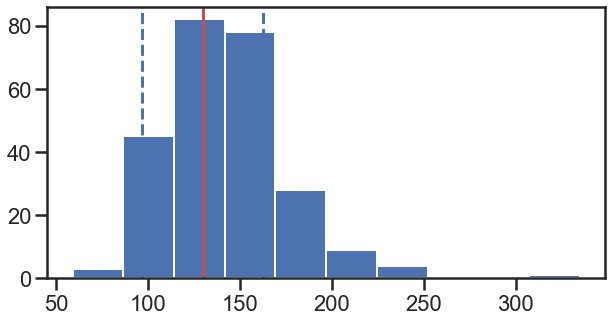

In [16]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.hist(df_omdb['Runtime'],edgecolor='white',align='right')
ax.axvline(x=np.mean(df_omdb['Runtime']),c='r')
ax.axvline(x=np.mean(df_omdb['Runtime'])-np.std(df_omdb['Runtime']),c='b',ls='--')
ax.axvline(x=np.mean(df_omdb['Runtime'])+np.std(df_omdb['Runtime']),c='b',ls='--')
plt.show()

In [17]:
df_omdb['Runtime']=pd.to_numeric(df_omdb['Runtime'],errors='coerce')
for i in range(250):
    if df_omdb.Runtime[i]<=125:
        df_omdb.Runtime[i]=0
    else: 
        df_omdb.Runtime[i]=1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
def clean(column_name):
    """This function takes a column from the dataframe and splits two elements
       if they are separated by a comma.
       For ex. in Actors column there might be values such as Christian Bale, Morgan Freeman.
       This will separate these two actors and store them individually in a list."""
    name=set()
    for name_string in df_omdb[column_name]:
        name.update(name_string.split(', '))
    name=sorted(name)
    return name

def top(column_name):
    """This function takes its input as name of the column and returns a sorted list of the 
       elements which occur very frequently in that column in descending order."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df_omdb[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    return nlt.index
    
def plot_column(column_name,n_elem_display=0):
    """ This function is used to plot a bar graph of a column of the dataframe.
        It takes its argument as name of column and number of elements to display and
        return a bar graph of the user defined number of top elements which occur
        frequently in that column."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df_omdb[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    if n_elem_display !=0:
        return nlt[:n_elem_display].plot(kind = "bar",figsize=(10,10))
    else:
        return nlt[:].plot(kind = "bar",figsize=(10,5))

<AxesSubplot:>

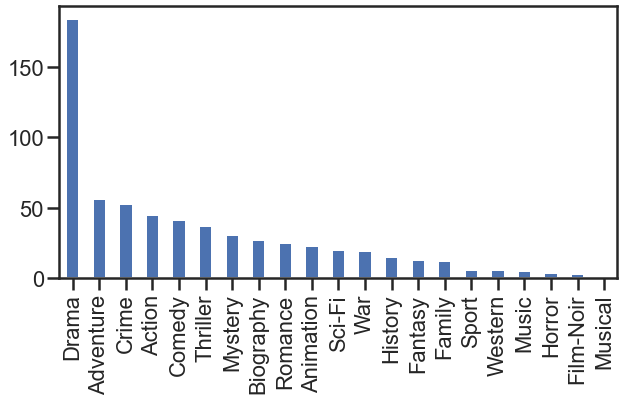

In [19]:
plot_column('Genre')

Elegiremos todos los géneros como nuestros predictores en nuestro conjunto de datos.

In [20]:
#Get the unique genres contained in the dataframe
genres=clean('Genre')
#Add one column for every genre in the dataframe
for genre in genres:
    df_omdb["genre:"+genre] = [int(genre in g.split(', ')) for g in df_omdb.Genre]

In [21]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western
0,The Shawshank Redemption,0,R,14 Oct 1994,1,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",[Two imprisoned men bond over a number of year...,English,United States,Nominated for 7 Oscars. 21 wins & 43 nominatio...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,434,594",tt0111161,movie,21 Dec 1999,"$28,699,976","Columbia Pictures, Castle Rock Entertainment",N/A,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Godfather,0,R,24 Mar 1972,1,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",[An organized crime dynasty's aging patriarch ...,"English, Italian, Latin",United States,Won 3 Oscars. 31 wins & 30 nominations total,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,694,603",tt0068646,movie,01 Aug 2013,"$134,966,411",Paramount Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,0,R,18 Dec 1974,1,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo","Al Pacino, Robert De Niro, Robert Duvall",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",United States,Won 6 Oscars. 17 wins & 20 nominations total,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,177,124",tt0071562,movie,24 May 2005,"$47,834,595","Paramount Pictures, Coppola Company",N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight,1,PG-13,18 Jul 2008,1,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",[When the menace known as the Joker wreaks hav...,"English, Mandarin","United States, United Kingdom",Won 2 Oscars. 159 wins & 163 nominations total,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,403,192",tt0468569,movie,09 Dec 2008,"$534,858,444",Syncopy,N/A,True,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12 Angry Men,0,Approved,10 Apr 1957,0,"Crime, Drama",Sidney Lumet,Reginald Rose,"Henry Fonda, Lee J. Cobb, Martin Balsam",[A jury holdout attempts to prevent a miscarri...,English,United States,Nominated for 3 Oscars. 17 wins & 13 nominatio...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,9.0,"719,240",tt0050083,movie,04 Mar 2008,N/A,Orion-Nova Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Ahora analicemos la cantidad de actores que se pueden usar como predictores en nuestro conjunto de datos.

<AxesSubplot:>

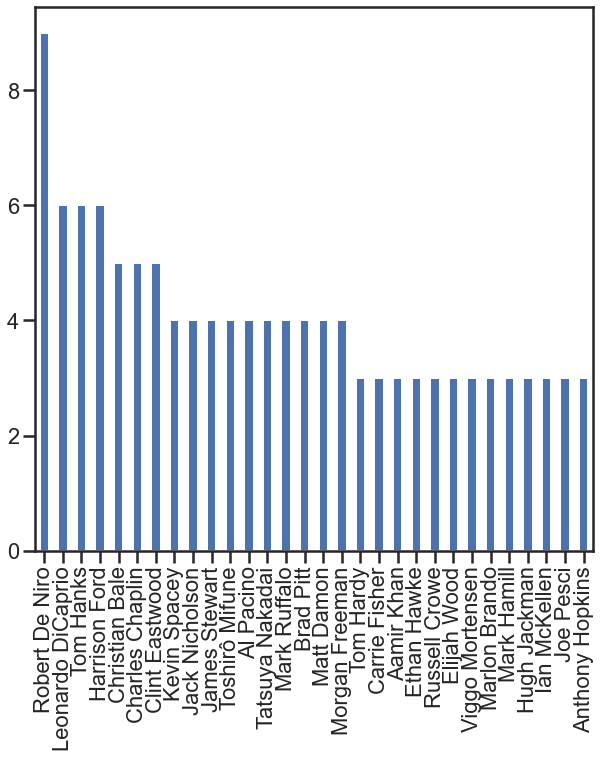

In [22]:
plot_column('Actors',30)

Por lo tanto, podemos tomar a los 30 actores principales, cada uno con más de 3 películas, en la lista de 250 películas principales de imdb.

In [23]:
#Adding actors to our dataset
actors=top('Actors')
actors
for actor in actors[:30]:
    df_omdb["Actor:"+actor] = [int(actor in a.split(', ')) for a in df_omdb.Actors]

------ 

Ahora los Directores

<AxesSubplot:>

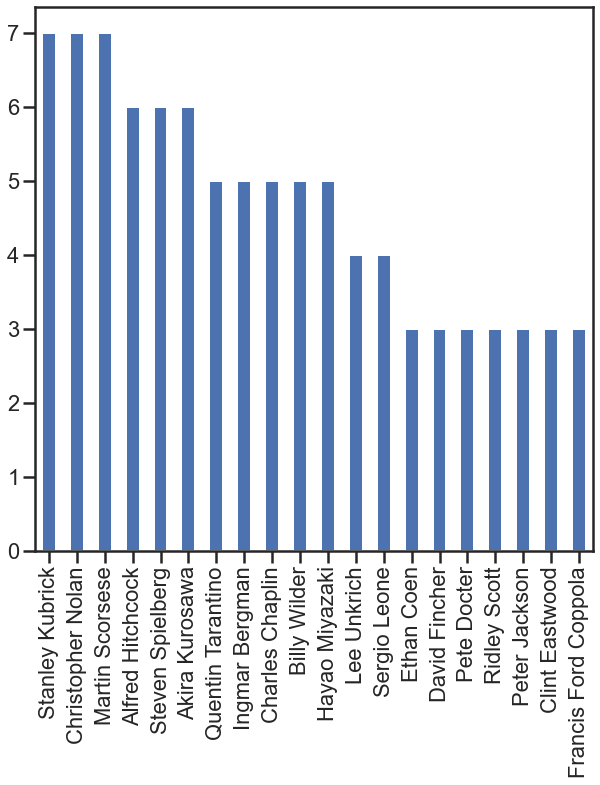

In [24]:
plot_column('Director',20)

In [25]:
directors=top('Director')
    
for director in directors[:20]:
    df_omdb["Director:"+director] = [int(director in d.split(', ')) for d in df_omdb.Director]

Analizar si tomar escritores o no como predictores.

In [26]:
writers1=set()
writers2=set()
for writer_string in df_omdb.Writer:
    writers1.update(writer_string.split(', '))
for j in writers1:
    writers2.update(j.rsplit(' (')[:1])
writers2 = sorted(writers2)

dummy_writers=pd.DataFrame()

# Add one column for every writer in the dataframe
for writer in writers2:
    dummy_writers[writer] = [int(writer in w.split(', ')) for w in df_omdb.Writer]   
dummy_writers

,Aaron Guzikowski,Abby Mann,Abhijat Joshi,Adam Elliot,Adolph Green,Agatha Christie,Agenore Incrocci,Agnieszka Holland,Akhilesh Jaiswal,Akira Kurosawa,Akiva Goldsman,Akiyuki Nosaka,Al Boasberg,Alan Ball,Alan Mak,Albert Hackett,Alec Coppel,Ales Adamovich,Alexander Korda,Amole Gupte,Andrei Tarkovsky,Andrew Kevin Walker,Andrew Knight,Andrew Niccol,Andrew Stanton,Andrey Konchalovskiy,Anthony Burgess,Anthony Tambakis,Anurag Kashyap,Arijit Biswas,Arkadiy Strugatskiy,Arthur C. Clarke,Asghar Farhadi,Auguste Le Breton,B. Traven,Ben Affleck,Ben Hecht,Bernd Eichinger,Betty Comden,Bibhutibhushan Bandyopadhyay,Bill Lancaster,Billy Wilder,Bo Goldman,Bob Gale,Bob Kane,Bob Peterson,Bong Joon Ho,Boris Strugatskiy,Brendan McCarthy,Brian Hayes Currie,...,Steven E. de Souza,Steven Zaillian,Sung-bo Shim,Sylvester Stallone,Sylvia Nasar,T.E. Lawrence,Ted Tally,Terence Winter,Terry George,Terry Gilliam,Terry Southern,Thea von Harbou,Thomas Harris,Thomas Keneally,Thomas Vinterberg,Tobias Lindholm,Todd Phillips,Tom McCarthy,Tom Schulman,Traudl Junge,Tullio Pinelli,Uma Thurman,Upton Sinclair,Valérie Beaugrand-Champagne,Vanna Paoli,Vidhu Vinod Chopra,Vincenzo Cerami,W.R. Burnett,Wajdi Mouawad,Walter Donohue,Walter Hill,Wes Anderson,William Davies,William Goldman,William Makepeace Thackeray,William Monahan,William Nicholson,William Wisher,Winston Groom,Wladyslaw Szpilman,Wolfgang Petersen,Yasuhiko Takiguchi,Yasujirô Ozu,Yavuz Turgul,Yogesh Chandekar,Yoshitoki Oima,Zach Lewis,Zdenek Mahler,Éric Toledano,Özge Efendioglu
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

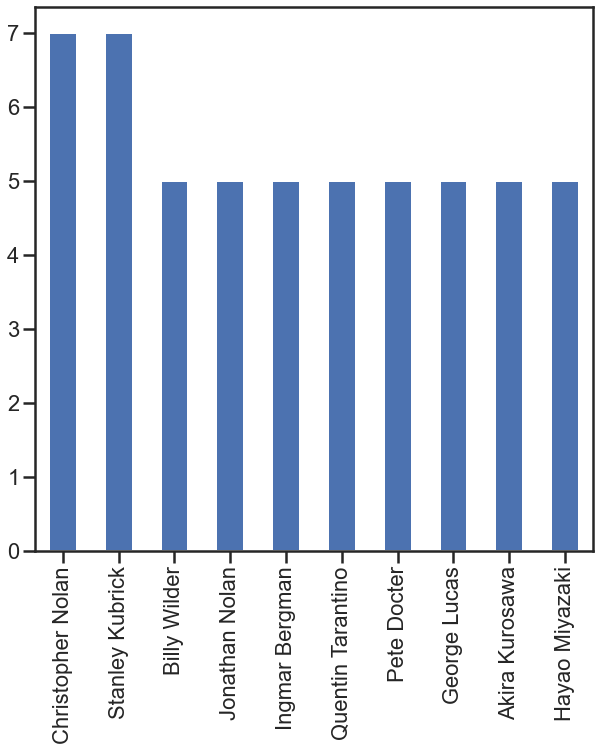

In [27]:
writerlist=[w for w in writers2]
wlt=dummy_writers[writerlist].sum()
wlt=wlt.sort_values(axis=0,ascending=False)
wlt.iloc[0:10].plot(kind = "bar",figsize=(10,10))

Dado que no hay muchos escritores que tengan un número significativo de películas, decidimos no tomar a los escritores como uno de nuestros predictores.

Ahora, exploraremos el predictor de lenguaje

<AxesSubplot:>

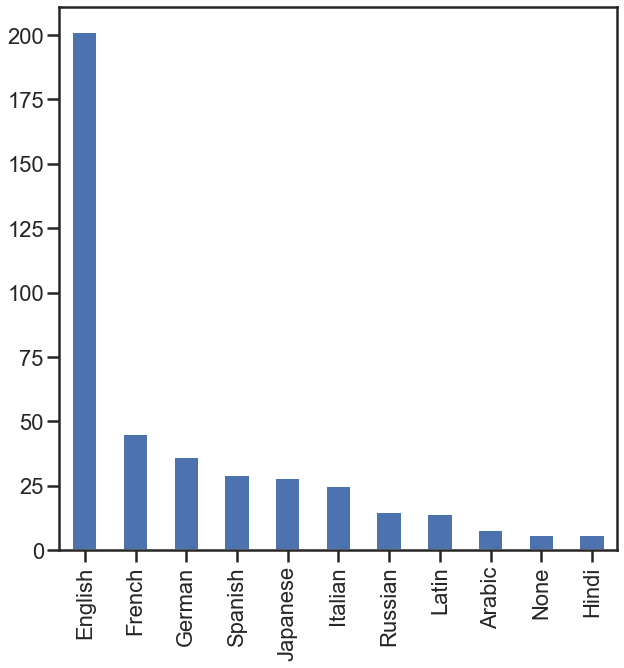

In [28]:
plot_column('Language',11)

In [29]:
df_omdb.shape

(250, 96)

Ahora por paises....

<AxesSubplot:>

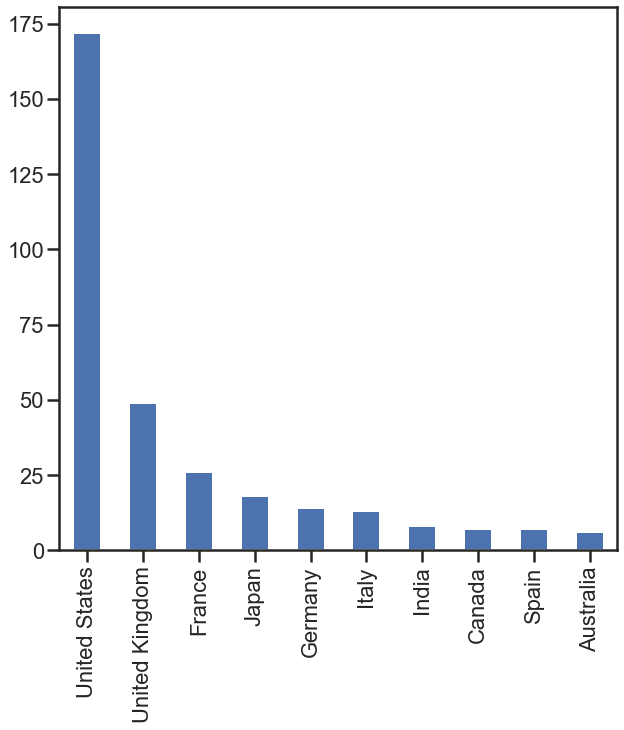

In [30]:
plot_column('Country',10)

Seleccionaremos los 10 países principales como nuestros predictores

In [31]:
#Adding all of the top 10 countries to our datset
countries=top('Country')

for country in countries[:10]:
    df_omdb["Country:"+country] = [int(country in c.split(', ')) for c in df_omdb.Country]

In [32]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western,Actor:Robert De Niro,Actor:Leonardo DiCaprio,Actor:Tom Hanks,Actor:Harrison Ford,...,Actor:Toshirô Mifune,Actor:Al Pacino,Actor:Tatsuya Nakadai,Actor:Mark Ruffalo,Actor:Brad Pitt,Actor:Matt Damon,Actor:Morgan Freeman,Actor:Tom Hardy,Actor:Carrie Fisher,Actor:Aamir Khan,Actor:Ethan Hawke,Actor:Russell Crowe,Actor:Elijah Wood,Actor:Viggo Mortensen,Actor:Marlon Brando,Actor:Mark Hamill,Actor:Hugh Jackman,Actor:Ian McKellen,Actor:Joe Pesci,Actor:Anthony Hopkins,Director:Stanley Kubrick,Director:Christopher Nolan,Director:Martin Scorsese,Director:Alfred Hitchcock,Director:Steven Spielberg,Director:Akira Kurosawa,Director:Quentin Tarantino,Director:Ingmar Bergman,Director:Charles Chaplin,Director:Billy Wilder,Director:Hayao Miyazaki,Director:Lee Unkrich,Director:Sergio Leone,Director:Ethan Coen,Director:David Fincher,Director:Pete Docter,Director:Ridley Scott,Director:Peter Jackson,Director:Clint Eastwood,Director:Francis Ford Coppola,Country:United States,Country:United Kingdom,Country:France,Country:Japan,Country:Germany,Country:Italy,Country:India,Country:Canada,Country:Spain,Country:Australia
0,The Shawshank Redemption,0,R,14 Oct 1994,1,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",[Two imprisoned men bond over a number of year...,English,United States,Nominated for 7 Oscars. 21 wins & 43 nominatio...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,434,594",tt0111161,movie,21 Dec 1999,"$28,699,976","Columbia Pictures, Castle Rock Entertainment",N/A,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,The Godfather,0,R,24 Mar 1972,1,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",[An organized crime dynasty's aging patriarch ...,"English, Italian, Latin",United States,Won 3 Oscars. 31 wins & 30 nominations total,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,694,603",tt0068646,movie,01 Aug 2013,"$134,966,411",Paramount Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,0,R,18 Dec 1974,1,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo","Al Pacino, Robert De Niro, Robert Duvall",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",United States,Won 6 Oscars. 17 wins & 20 nominations total,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,177,124",tt0071562,movie,24 May 2005,"$47,834,595","Paramount Pictures, Coppola Company",N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,The Dark Knight,1,PG-13,18 Jul 2008,1,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart",[When the menace known as the Joker wreaks hav...,"English, Mandarin","United States, United Kingdom",Won 2 Oscars. 159 wins & 163 nominations total,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,403,192",tt0468569,movie,09 Dec 2008,"

---
---
---
<h1><center>Referencias y links de interés</center></h1>

---

* Librería de [NLTK](https://www.nltk.org/) 
* Método de [Stemming](https://www.geeksforgeeks.org/snowball-stemmer-nlp/)
* [Extracción de características](https://scikit-learn.org/stable/modules/feature_extraction.html)
* Librería de [scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html)
* Codificación [one-hot](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)